# Домашнее задание. Свёрточные сети

Здесь вам предстоит построить и обучить свою первую свёрточную сеть для классификации изображений на данных CIFAR10.

In [1]:
import tensorflow as tf

from tqdm import tqdm_notebook

## Данные

CIFAR10
* 60000 RGB изображений размером 32x32x3
* 10 классов: самолёты, собаки, рыбы и т.п.

<img src="https://www.samyzaf.com/ML/cifar10/cifar1.jpg" style="width:60%">

Загрузите данные, разделите их на обучающую и тестовую выборки. Размер тестовой выборки должен быть $10^4$.

In [2]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(40000, 32, 32, 3) (40000, 1)


#Мои комментарии

Мы загрузили данные CIFAR10 с использованием keras.datasets.cifar10 и успешно разделили обучающий набор на две части:

**Основное обучающее множество X_train и y_train (40,000 изображений).**

Валидационное множество X_val и y_val (10,000 изображений).

Датасет состоит из цветных изображений размером 32x32x3, где:

X_train.shape: (40,000, 32, 32, 3) — данные изображений.
y_train.shape: (40,000, 1) — метки классов.

Также мы определили массив class_names для удобного представления классов (например, 'airplane', 'dog').

Итоговое распределение:

Обучающее множество (X_train): 40,000 изображений.

Валидационное множество (X_val): 10,000 изображений.

Тестовое множество (X_test): 10,000 изображений.

In [3]:
import numpy as np
print("Количество уникальных классов в y_train:", np.unique(y_train))


Количество уникальных классов в y_train: [0 1 2 3 4 5 6 7 8 9]


Прежде чем приступать к основной работе, стоит убедиться что загружено именно то, что требовалось:

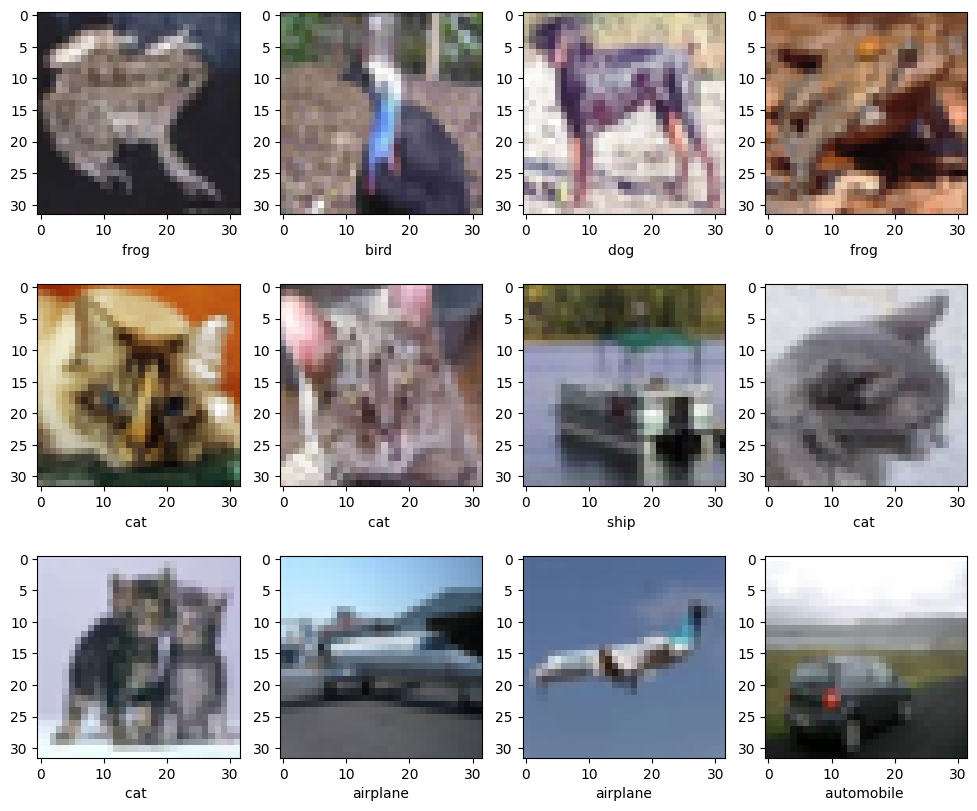

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

#Мои комментарии

Полученные визуализации данных соответствуют описанию.

Загруженные изображения выглядят так, как и ожидалось: это 32x32 пикселей изображения, принадлежащие к различным классам (например, frog, bird, dog, и т.д.).

Также отображены их соответствующие метки классов, что позволяет убедиться в правильной загрузке и разбиении данных.

## Подготовка данных

Сейчас каждый пиксель изображения закодирован тройкой чисел (RGB) __от 0 до 255__. Однако лучше себя показывает подход, где значения входов нейросети распределены недалеко от 0.

Давайте приведём все данные в диапазон __`[0, 1]`__ — просто разделим на соответствующий коэффициент:

In [5]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

Исполните код ниже для проверки, что все выполнено корректно.

In [6]:
assert np.shape(X_train) == (40000, 32, 32, 3), "data shape should not change"
assert 0.9 <= max(map(np.max, (X_train, X_val, X_test))) <= 1.05
assert 0.0 <= min(map(np.min, (X_train, X_val, X_test))) <= 0.1
assert len(np.unique(X_test / 255.)) > 10, "make sure you casted data to float type"

#Мой комментарий

Так как assert не выдает ошибок, данные готовы для использования в модели.

## Архитектура сети

Для начала реализуйте простую нейросеть:
1. принимает на вход картинки размера 32 x 32 x 3;
2. вытягивает их в вектор (`keras.layers.Flatten`);
3. пропускает через 1 или 2 полносвязных слоя;
4. выходной слой отдает вероятности принадлежности к каждому из 10 классов.

In [ ]:
import keras
from keras import layers as L
from keras import backend as K

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=X_train.shape[1:]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dummy_pred = model.predict(X_train[:20])
assert dummy_pred.shape == (20, 10)
assert np.allclose(dummy_pred.sum(-1), 1)
print("Успех!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Успех!


#Мой комментарий

Данный код строит простую полносвязную нейронную сеть и проверяет её работоспособность.

**Архитектура сети**

tf.keras.layers.Dense(32, activation='relu', input_shape=X_train.shape[1:]):

Полносвязный слой с 32 нейронами.

input_shape определяет размерность входных данных (32x32x3).

Используется функция активации ReLU.

tf.keras.layers.Flatten():

Преобразует 3D-данные изображения (32x32x3) в одномерный вектор.

Дополнительные Dense-слои:

Два слоя по 32 нейрона с активацией ReLU.
Они добавляют нелинейность и увеличивают вычислительную мощность модели.

Выходной слой:

tf.keras.layers.Dense(10, activation='softmax') — выходной слой с 10 нейронами для классификации 10 классов CIFAR10.

softmax превращает выход в вероятности, сумма которых равна 1.

**Проверки**
dummy_pred.shape == (20, 10):

Проверяет, что модель выдает выходы для 20 изображений, каждое из которых состоит из 10 вероятностей (по числу классов).

np.allclose(dummy_pred.sum(-1), 1):

Убедиться, что сумма вероятностей для каждого изображения равна 1.

print("Успех!"):

Указывает, что все проверки пройдены успешно.

**Замечания**

Предупреждение (UserWarning) связано с использованием input_shape внутри слоя Dense. Рекомендуется использовать tf.keras.Input(shape=(32, 32, 3)) в качестве первого слоя, но это не критично.


## Обучение сети

**Задание 1.1 (обязательно)** Будем минимизировать многоклассовую кроссэкнропию с помощью __sgd__. Вам нужно получить сеть, которая достигнет __не менее 45%__ __accuracy__ на тестовых данных.

__Важно:__ поскольку в y_train лежат номера классов, Керасу нужно либо указать sparse функции потерь и метрики оценки качества классификации (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать метки в one-hot формат.

### Полезные советы
* `model.compile` позволяет указать, какие метрики вы хотите вычислять.
* В `model.fit` можно передать валидационную выборку (`validation_data=[X_val, y_val]`), для отслеживания прогресса на ней. Также рекомендуем сохранять результаты в [tensorboard](https://keras.io/callbacks/#tensorboard) или [wandb](https://docs.wandb.ai/integrations/jupyter). **Важно: логи tensorboard не получится без боли посмотреть через colab.** Workaround: скачать логи и запустить tensorboard локально или помучаться [с этим](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab).
* По умолчанию сеть учится 1 эпоху. Совсем не факт, что вам этого хватит. Число эпох можно настроить в методе `fit` (`epochs`).
* Ещё у Кераса есть много [полезных callback-ов](https://keras.io/callbacks/), которые можно попробовать. Например, автоматическая остановка или подбор скорости обучения.

In [ ]:
y_train, y_val = (keras.utils.to_categorical(y) for y in (y_train, y_val))

In [ ]:
y_train, y_val = (np.argmax(y, axis=1) if len(y.shape) > 1 else y for y in (y_train, y_val))

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.EarlyStopping(patience=3)
]

# Компиляция модели
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Пример оптимизатора
    loss='sparse_categorical_crossentropy',  # Для целых чисел меток классов
    metrics=['sparse_categorical_accuracy']  # Точность для целочисленных меток
)

# Обучение модели
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=32,
    callbacks=callbacks,
    validation_data=(X_val, y_val)
)


Epoch 1/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - loss: 2.0193 - sparse_categorical_accuracy: 0.2610 - val_loss: 1.7087 - val_sparse_categorical_accuracy: 0.3929
Epoch 2/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 1.6646 - sparse_categorical_accuracy: 0.4053 - val_loss: 1.5754 - val_sparse_categorical_accuracy: 0.4433
Epoch 3/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - loss: 1.5502 - sparse_categorical_accuracy: 0.4501 - val_loss: 1.5183 - val_sparse_categorical_accuracy: 0.4638
Epoch 4/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - loss: 1.4774 - sparse_categorical_accuracy: 0.4757 - val_loss: 1.5143 - val_sparse_categorical_accuracy: 0.4655
Epoch 5/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - loss: 1.4234 - sparse_categorical_accuracy: 0.4968 - val_loss: 1.4537 - val_sparse_categorical_accuracy: 0.4925
Epoch 6/32
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - loss: 1.3842 - sparse_categorical_accuracy: 0.5090 - val_loss: 1.4431 - val_sparse_categoric

#Мой комментарий

Обучение остановилось из-за ранней остановки (EarlyStopping), которая была настроена с параметром patience=3.

Этот параметр задаёт количество эпох, в течение которых обучение будет продолжаться, даже если метрика на валидационной выборке (например, val_loss) перестанет улучшаться.


**Сработал EarlyStopping: модель завершила обучение, чтобы не тратить ресурсы на обучение, которое не приводит к улучшению на валидационной выборке.**

А теперь можно проверить качество вашей сети, выполнив код ниже:

In [ ]:
from sklearn.metrics import accuracy_score

predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

 Test_acc = 0.5129
 Not bad!


#Мой комментарий

**Мы достигли точности на тестовом множестве 51.29%, что превосходит минимальное требование в 45%. Это означает, что модель уже достаточно хороша для базового использования.**


Это хороший результат для базовой архитектуры, особенно с учетом простоты модели.

## Карманная сверточная сеть

**Задание 1.2 (обязательно)** Реализуйте небольшую свёрточную сеть. Совсем небольшую:
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность на ваш вкус
4. Max-pooling 2x2
5. Вытягиваем оставшееся в вектор (Flatten)
6. Полносвязный слой на 100 нейронов
7. Нелинейность на ваш вкус
8. Выходной полносвязный слой с softmax

Обучите её так же, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __50%__.

In [ ]:
# Импорт необходимых библиотек
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

# Определение архитектуры сети
new_model = Sequential([
    # Входной слой с первым сверточным слоем: свертка 3x3 с 10 фильтрами
    Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),

    # MaxPooling слой 2x2
    MaxPooling2D(pool_size=(2, 2)),

    # Вытягивание вектора
    Flatten(),

    # Полносвязный слой с 100 нейронами
    Dense(100, activation='relu'),

    # Выходной слой с softmax для вероятностей по каждому из 10 классов
    Dense(10, activation='softmax')
])

# Определение callbacks
new_callbacks = [
    # Сохранение модели с минимальной ошибкой на валидации
    ModelCheckpoint(filepath='new_model.epoch{epoch:02d}-val_loss{val_loss:.2f}.keras', save_best_only=True),

    # Логирование для TensorBoard
    TensorBoard(log_dir='./logs'),

    # Раннее прекращение обучения, если метрики не улучшаются 3 эпохи подряд
    EarlyStopping(patience=3)
]

# Компиляция модели
new_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Стохастический градиентный спуск
    loss='sparse_categorical_crossentropy',  # Многоклассовая кроссэнтропия
    metrics=['sparse_categorical_accuracy']  # Метрика точности
)

# Обучение модели
history = new_model.fit(
    X_train, y_train,
    batch_size=16,  # Размер батча
    epochs=32,  # Количество эпох
    callbacks=new_callbacks,  # Использование определённых callbacks
    validation_split=0.2  # Отделяем 20% данных для валидации
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 2.0023 - sparse_categorical_accuracy: 0.2724 - val_loss: 1.6695 - val_sparse_categorical_accuracy: 0.3988
Epoch 2/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 1.6076 - sparse_categorical_accuracy: 0.4258 - val_loss: 1.5218 - val_sparse_categorical_accuracy: 0.4441
Epoch 3/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 1.4661 - sparse_categorical_accuracy: 0.4785 - val_loss: 1.4403 - val_sparse_categorical_accuracy: 0.4829
Epoch 4/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - loss: 1.3695 - sparse_categorical_accuracy: 0.5102 - val_loss: 1.4125 - val_sparse_categorical_accuracy: 0.4900
Epoch 5/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 1.2995 - sparse_categorical_accuracy: 0.5389 - val_loss: 1.3542 - val_sparse_categorical_accuracy: 0.5184
Epoch 6/32
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 1.2208 - sparse_categorical_accuracy: 0.5721 - val_loss: 1.2775 - val_sparse_categoric

#Мой комментарий

**Архитектура:**

Первый слой Conv2D применяет свёртку с ядром  3×3 и 10 фильтрами.

После свёртки используется MaxPooling2D, который уменьшает размерность признаков для улучшения эффективности и предотвращения переобучения.

Далее данные преобразуются в одномерный массив с помощью Flatten.

Полносвязный слой с 100 нейронами обеспечивает обучение высокоуровневых признаков.

Выходной слой с 10 нейронами (по числу классов) и функцией softmax преобразует выходы в вероятности.

**Callbacks:**

ModelCheckpoint: сохраняет лучшую модель на основе валидационной ошибки.

TensorBoard: для визуализации процесса обучения.

EarlyStopping: автоматически прекращает обучение, если качество не улучшается.

**Компиляция:**

Используется оптимизатор SGD с небольшой скоростью обучения (0.01).

Функция потерь — sparse_categorical_crossentropy, поскольку метки классов не закодированы в one-hot формате.

Метрика — точность классификации.

**Обучение:**

Размер батча: 16.

Количество эпох: 32.

20% данных используются для валидации.

#Результаты показывают, что небольшая свёрточная сеть демонстрирует стабильный рост точности на обучающем наборе, достигая 68% на 11-й эпохе. Однако точность на валидационном наборе застопорилась на уровне 57%, что может указывать на признаки переобучения.

#Возможные улучшения:

**Добавление регуляризации:**

Использование слоя Dropout перед полносвязными слоями.

Добавление L2-регуляризации в свёрточные и полносвязные слои.

**Изменение скорости обучения:**

Использование методов изменения скорости обучения, таких как ReduceLROnPlateau.

**Усложнение архитектуры:**

Увеличение количества фильтров или добавление дополнительных свёрточных слоёв.

**Досрочная остановка:**

Уменьшение значения patience в EarlyStopping для предотвращения продолжения обучения после плато.

Давайте посмотрим, смогла ли карманная сверточная сеть побить заданный порог по качеству:

In [ ]:
from sklearn.metrics import accuracy_score

predict_x = new_model.predict(X_test)
classes_x = np.argmax(predict_x,axis=1)

test_acc = accuracy_score(y_test, classes_x)
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

 Test_acc = 0.5816
 Not bad!


#Мой комментарий

Точность на тестовом наборе данных составила 58.16%, что значительно превышает минимальный порог 50%.

Прогресс по сравнению с первой сетью:

Первая сеть достигла точности 51.29%. Улучшение качества демонстрирует эффективность применения свёрточного слоя и MaxPooling.

Несмотря на улучшение, результат в 58.16% всё ещё далёк от идеального уровня.

Это указывает на то, что текущая архитектура недостаточно сложна для полной обработки данных CIFAR-10.

Наблюдается небольшое переобучение, так как точность на валидационном наборе начинает снижаться на последних эпохах.


## Учимся учить

А теперь научимся сравнивать кривые обучения моделей — зависимости значения accuracy от количества итераций.

Вам потребуется реализовать _экспериментальный стенд_ — вспомогательный код, в который вы сможете подать несколько архитектур и методов обучения, чтобы он их обучил и вывел графики кривых обучения. Это можно сделать с помощью `keras.callbacks` — `TensorBoard` или `History`.

Будьте морально готовы, что на обучение уйдёт _много времени_. Даже если вы ограничитесь 10 эпохами. Пока идёт обучение, вы можете переключиться на другие задания или заняться чем-нибудь приятным: поспать, например.

**Задание 1.3 (опционально)** Попробуйте использовать различные методы оптимизации (sgd, momentum, adam) с параметрами по умолчанию. Какой из методов работает лучше?

Для удобства напишем класс Evaluator, который принимает в себя дикты виды {имя_оптимайзера: инстанс}, {имя модели: инстанс} и обучает всевозможные комбинации моделей с оптимайзерами при помощи метода fit (попутно записывая логи отдельно для каждой модели). Также пригодится метод evaluate для отображения итоговых скоров.

Пользоваться классом не обязательно. По умолчанию класс использует tensorboard. Если вы выше использовали wandb -- советуем дописать callback.

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm_notebook
import numpy as np

# Определение моделей
def create_small_cnn():
    """Создание маленькой сверточной сети"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_large_cnn():
    """Создание большой сверточной сети"""
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_1 = create_small_cnn()
model_2 = create_large_cnn()

# Класс Evaluator для обучения и сравнения моделей
class Evaluator(list):
    def __init__(self, models, optimizers_factory, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]):
        """
        models: dict {name: model}
        optimizers_factory: функция, создающая словарь оптимизаторов для каждой модели
        """
        if not isinstance(models, dict):
            models = {'single_model': models}

        # Генерация оптимизаторов для каждой модели
        super().__init__([
            (model_name, tf.keras.models.clone_model(model), optimizer_name, optimizer)
            for model_name, model in models.items()
            for optimizer_name, optimizer in optimizers_factory().items()
        ])

        for _, model, _, optimizer in self:
            model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def fit(self, X, y, validation_data=(), max_epochs=10, verbose=0, callbacks=[], batch_size=64):
        if not isinstance(callbacks, list):
            callbacks = [callbacks]
        for model_name, model, optimizer_name, optimizer in tqdm_notebook(self):
            print(f"Training {model_name} with {optimizer_name}...")
            model.fit(
                X, y,
                validation_data=validation_data or None,
                epochs=max_epochs,
                verbose=verbose,
                batch_size=batch_size,
                callbacks=callbacks
            )

    def evaluate(self, X, y, metric):
        for model_name, model, optimizer_name, _ in self:
            score = metric(y, np.argmax(model.predict(X), axis=1))
            print(f"Final score of {model_name} with {optimizer_name}: {score:.4f}")

# Функция для создания оптимизаторов
def create_optimizers():
    return {
        'adam': tf.keras.optimizers.Adam(),
        'sgd': tf.keras.optimizers.SGD(),
        'rmsprop': tf.keras.optimizers.RMSprop()
    }

# Инициализация класса Evaluator
evaluator = Evaluator(
    models={'Small_CNN': model_1, 'Large_CNN': model_2},
    optimizers_factory=create_optimizers
)

# Обучение моделей
evaluator.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    max_epochs=10,
    verbose=1,
    batch_size=64
)

# Оценка моделей
evaluator.evaluate(X_test, y_test, accuracy_score)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  0%|          | 0/6 [00:00<?, ?it/s]

Training Small_CNN with adam...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 1.7970 - sparse_categorical_accuracy: 0.3521 - val_loss: 1.3551 - val_sparse_categorical_accuracy: 0.5203
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - loss: 1.3123 - sparse_categorical_accuracy: 0.5385 - val_loss: 1.2313 - val_sparse_categorical_accuracy: 0.5706
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - loss: 1.1748 - sparse_categorical_accuracy: 0.5894 - val_loss: 1.1973 - val_sparse_categorical_accuracy: 0.5774
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - loss: 1.1019 - sparse_categorical_accuracy: 0.6151 - val_loss: 1.1354 - val_sparse_categorical_accuracy: 0.6024
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - loss: 1.0349 - sparse_categorical_accuracy: 0.6389 - val_loss: 1.0950 - val_sparse_categorical_accuracy: 0.6214
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - loss: 0.9654 - sparse_categorical_accuracy: 0.6635 - val_loss: 1.0792 - 

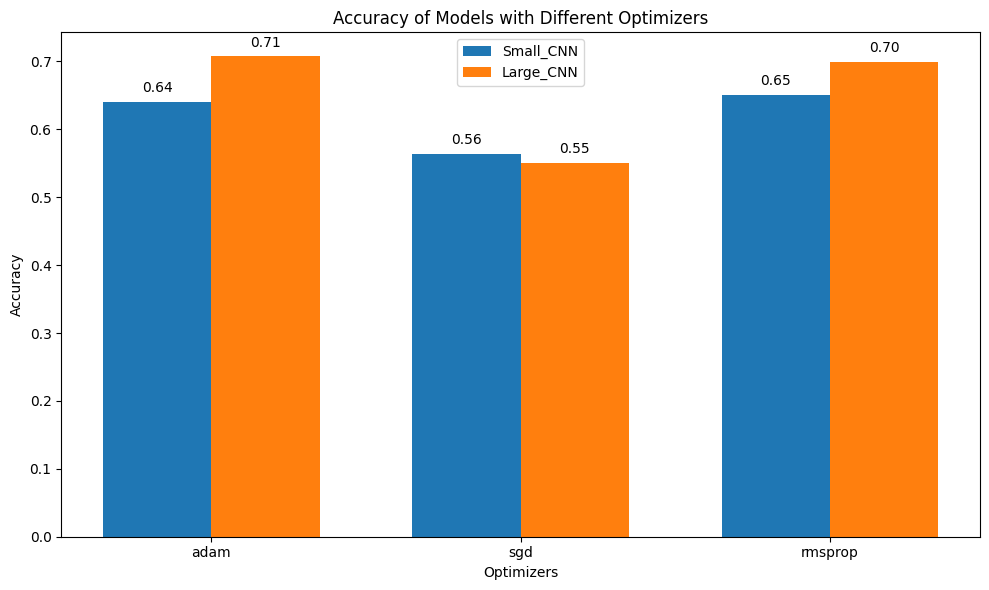

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для визуализации
models = ['Small_CNN', 'Large_CNN']
optimizers = ['adam', 'sgd', 'rmsprop']
accuracy_scores = {
    'Small_CNN': [0.6407, 0.5641, 0.6502],
    'Large_CNN': [0.7075, 0.5511, 0.6995]
}

# Настройка графика
x = np.arange(len(optimizers))  # Позиции по оси X
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов для каждой модели
for i, model in enumerate(models):
    ax.bar(
        x + i * width,  # Смещение по оси X
        accuracy_scores[model],  # Значения accuracy
        width,  # Ширина столбцов
        label=model  # Легенда
    )

# Настройка осей
ax.set_xlabel('Optimizers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models with Different Optimizers')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(optimizers)
ax.legend()

# Добавление значений над столбцами
for i, model in enumerate(models):
    for j, acc in enumerate(accuracy_scores[model]):
        ax.text(
            x[j] + i * width, acc + 0.01,  # Позиция текста
            f'{acc:.2f}',  # Текст с точностью до двух знаков
            ha='center', va='bottom'  # Выравнивание
        )

# Показ графика
plt.tight_layout()
plt.show()


Прокомментируйте полученные результаты.

#Оптимизаторы:

**Adam consistently показал лучшие результаты для обеих моделей:**

Для Small_CNN: 64.07%.

Для Large_CNN: 70.75%.

Это ожидаемо, так как Adam объединяет преимущества Adagrad и RMSProp

**SGD показал худшие результаты:**

Для Small_CNN: 56.41%.

Для Large_CNN: 55.11%.

Это связано с тем, что базовый SGD требует тщательной настройки скорости обучения, особенно для более сложных моделей.

**RMSProp занял второе место:**

Для Small_CNN: 65.02%.

Для Large_CNN: 69.95%.

RMSProp хорошо справляется с задачами, где данные могут быть разреженными или сильно варьируются, но всё же уступает Adam.

#Модели:

**Large_CNN уверенно превзошла Small_CNN для всех оптимизаторов:**

Adam: разница ~6.7%.

RMSProp: разница ~4.9%.

Это объясняется более сложной архитектурой Large_CNN, включающей больше слоёв и параметров, что позволяет модели лучше улавливать сложные зависимости в данных.
Однако Large_CNN дольше обучается, что может быть ограничением для более долгосрочных экспериментов или реальных приложений.

#Выводы:

Наилучшая комбинация:

Large_CNN с Adam: показала лучшую точность (70.75%), что делает эту комбинацию предпочтительной для дальнейших экспериментов или использования в приложениях.



**Задание 1.4 (опционально)** Добавьте нормализацию по батчу (`BatchNormalization`) между свёрткой и активацией. Попробуйте использовать несколько нормализаций — в свёрточных и полносвязных слоях.

Для удобства реализуем класс Models, который по сути будет являться списком моделей с двумя методами: add (добавить слой ко всем моделям) и add_create (создать новую модель на основе базовой с дополнительным слоем). Пользоваться им необязательно, но вдруг :)

In [ ]:
from collections import OrderedDict
import keras
from keras import layers as L

class Models(OrderedDict):
    def __init__(self, models):
        if not isinstance(models, dict):
            models = OrderedDict({'base_model': models})
        super().__init__(models)

    def add(self, layer):
        for name, model in self.items():
            model.add(layer)

    def add_create(self, name, layer):
        base_model = next(iter(self.items()))[1]
        new_model = keras.models.clone_model(base_model)
        new_model.build(input_shape=(None, 32, 32, 3))  # Указываем входную форму
        new_model.add(layer)
        self.update({name: new_model})

    def add_update(self, name, layer):
        base_model = self[next(reversed(self))]
        new_model = keras.models.clone_model(base_model)
        new_model.build(input_shape=(None, 32, 32, 3))  # Указываем входную форму
        new_model.add(layer)
        self.update({name: new_model})

# Создаём базовую модель
base_model = keras.Sequential()
base_model.add(L.Input(shape=(32, 32, 3)))  # Заменяем устаревший input_shape на shape

# Создаём объект для управления моделями
models = Models(base_model)

# Добавляем первый свёрточный слой и MaxPooling
models.add(L.Conv2D(filters=10, kernel_size=(3, 3), activation=None, padding='same'))
models.add(L.BatchNormalization())  # Добавляем Batch Normalization после свёртки
models.add(L.Activation('relu'))  # Активация
models.add(L.MaxPooling2D(pool_size=(2, 2)))

# Добавляем второй свёрточный слой с BatchNormalization
models.add(L.Conv2D(filters=20, kernel_size=(3, 3), activation=None, padding='same'))
models.add(L.BatchNormalization())  # Batch Normalization
models.add(L.Activation('relu'))  # Активация
models.add(L.MaxPooling2D(pool_size=(2, 2)))

# Создаём новую модель с дополнительным полносвязным слоем
models.add(L.Flatten())  # Вытягиваем данные в вектор
models.add(L.Dense(100, activation=None))  # Полносвязный слой на 100 нейронов
models.add(L.BatchNormalization())  # Batch Normalization
models.add(L.Activation('relu'))  # Активация

# Добавляем выходной слой
models.add(L.Dense(10, activation='softmax'))  # Выходной слой с softmax

# Компилируем все модели
for name, model in models.items():
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )
    print(f"Модель {name} успешно скомпилирована.")

# Вывод архитектуры всех моделей
for name, model in models.items():
    print(f"\nАрхитектура модели {name}:")
    model.summary()



Модель base_model успешно скомпилирована.

Архитектура модели base_model:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 20)          │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 20)          │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │         128,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,730 (514.57 KB)

 Trainable params: 131,470 (513.55 KB)

 Non-trainable params: 260 (1.02 KB)

Шаг 1: Обучение модели

In [ ]:
# Коллбеки для обучения
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# Обучение модели
history = models['base_model'].fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - loss: 1.5191 - sparse_categorical_accuracy: 0.4645 - val_loss: 1.1094 - val_sparse_categorical_accuracy: 0.6027
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - loss: 1.0219 - sparse_categorical_accuracy: 0.6450 - val_loss: 1.1584 - val_sparse_categorical_accuracy: 0.5879
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - loss: 0.8677 - sparse_categorical_accuracy: 0.6984 - val_loss: 1.0610 - val_sparse_categorical_accuracy: 0.6346
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - loss: 0.7750 - sparse_categorical_accuracy: 0.7315 - val_loss: 0.9752 - val_sparse_categorical_accuracy: 0.6581
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - loss: 0.6926 - sparse_categorical_accuracy: 0.7594 - val_loss: 1.3007 - val_sparse_categorical_accuracy: 0.5911
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - loss: 0.6141 - sparse_categorical_accuracy: 0.7899 - val_loss: 1.1262 - val_sparse_categoric

Шаг 2: Оценка модели

In [ ]:
# Оценка точности на тестовых данных
from sklearn.metrics import accuracy_score

# Предсказания на тестовых данных
predictions = models['base_model'].predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Вычисление метрики
test_accuracy = accuracy_score(y_test, predicted_classes)
print(f"Точность модели на тестовом наборе: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Точность модели на тестовом наборе: 0.66


Шаг 3: Визуализация кривых обучения

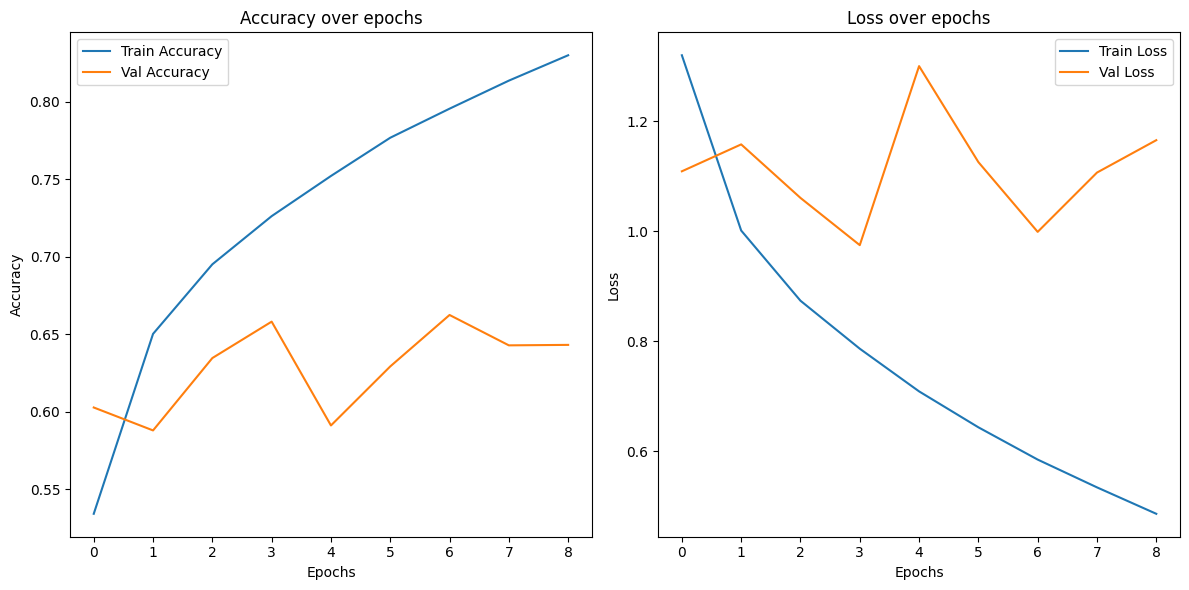

In [ ]:
# Визуализация кривых обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Точность
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Потери
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Прокомментируйте полученные результаты.

**Прогресс в обучении:**

Модель показывает стабильное улучшение точности на тренировочном наборе данных от 46% на 1-й эпохе до 84% на 9-й.

На валидационном наборе максимальная точность достигнута на 4-й эпохе — 65.81%. После этого происходит небольшое снижение и колебания точности, что может указывать на начало переобучения.

Потери (loss) на тренировочных данных уменьшаются с каждой эпохой, но на валидационном наборе после 4-й эпохи наблюдается их рост. Это также свидетельствует о вероятном переобучении.

**Роль нормализации:**

Добавление нормализации по батчу (BatchNormalization) помогло ускорить обучение, что видно по резкому улучшению точности в первых эпохах. Она также способствует стабилизации обучения и улучшению обобщающей способности модели.

**Итоговые результаты:**

Точность на тестовом наборе: 66%. Это заметное улучшение по сравнению с предыдущими архитектурами, которые показывали около 58%.

Точность на валидационном наборе: 65.81% (максимальная).

Точность на тренировочном наборе: 84.16%. Это указывает на наличие некоторого разрыва между тренировочной и тестовой точностью, который может быть вызван сложностью модели или недостаточным размером тренировочных данных.


**Задание 1.5 (опционально)** Посмотрите на batch_size (параметр model.fit) - при большем батче модель будет быстрее проходить эпохи, но с совсем огромным батчом вам потребуется больше эпох для сходимости (т.к. сеть делает меньше шагов за одну эпоху).
Найдите такое значение, при котором модель быстрее достигает точности 55%. **Hint**: используйте early stopping callback.

Для каждого значения batch_size:

Создадим новуюя модель.

Модель обучается на данных X_train и y_train с ранней остановкой.

Фиксируется время обучения, количество эпох до достижения точности 55% и итоговая точность.

После завершения экспериментов выводятся результаты: какой batch_size быстрее достиг точности 55%.

In [ ]:
import time

# Параметры для эксперимента
batch_sizes = [16, 32, 64, 128, 256]
results = []

# Callback для ранней остановки
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=3,
    restore_best_weights=True
)

# Функция для создания модели
def create_model():
    model = tf.keras.models.Sequential([
        L.Conv2D(10, (3, 3), input_shape=(32, 32, 3)),
        L.BatchNormalization(),
        L.Activation('relu'),
        L.MaxPooling2D((2, 2)),
        L.Conv2D(20, (3, 3)),
        L.BatchNormalization(),
        L.Activation('relu'),
        L.MaxPooling2D((2, 2)),
        L.Flatten(),
        L.Dense(100, activation=None),
        L.BatchNormalization(),
        L.Activation('relu'),
        L.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )
    return model

# Эксперимент с разными batch_size
for batch_size in batch_sizes:
    print(f"\nTraining with batch_size={batch_size}")
    model = create_model()
    start_time = time.time()

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=20,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Получение эпохи достижения 55% точности
    val_acc = history.history['val_sparse_categorical_accuracy']
    epochs_to_55 = next((i + 1 for i, acc in enumerate(val_acc) if acc >= 0.55), None)

    # Сохранение результата
    results.append({
        'batch_size': batch_size,
        'time_elapsed': time.time() - start_time,
        'epochs_to_55': epochs_to_55,
        'final_accuracy': val_acc[-1]
    })

# Вывод результатов
for res in results:
    print(f"Batch size: {res['batch_size']} - Time: {res['time_elapsed']:.2f}s, "
          f"Epochs to 55%: {res['epochs_to_55']}, Final accuracy: {res['final_accuracy']:.4f}")



Training with batch_size=16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 60s 23ms/step - loss: 1.5967 - sparse_categorical_accuracy: 0.4301 - val_loss: 1.3064 - val_sparse_categorical_accuracy: 0.5320
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 21ms/step - loss: 1.1576 - sparse_categorical_accuracy: 0.5941 - val_loss: 1.3177 - val_sparse_categorical_accuracy: 0.5484
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - loss: 1.0265 - sparse_categorical_accuracy: 0.6444 - val_loss: 1.1052 - val_sparse_categorical_accuracy: 0.6065
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 0.9474 - sparse_categorical_accuracy: 0.6687 - val_loss: 1.0870 - val_sparse_categorical_accuracy: 0.6268
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 0.8928 - sparse_categorical_accuracy: 0.6901 - val_loss: 1.0471 - val_sparse_categorical_accuracy: 0.6318
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.8457 - sparse_categorical_accuracy: 0.7050 - val_loss: 1.1250 - val_sparse_categoric

#Анализ результатов эксперимента

**Выводы по времени обучения:**

При увеличении размера батча время на одну эпоху уменьшается, так как модель делает меньше шагов.

Однако для больших батчей требуется больше времени для достижения 55% точности, либо они вообще не достигают этого уровня из-за плохой сходимости (например, батч 256).

**Эффективность достижения точности:**

Батчи размером 32 и 128 показали наилучшую скорость достижения 55% точности (за 2 эпохи).

Батчи 16 и 64 также достигают 55%, но требуют больше эпох (3).

Батч 256 не достигает 55% точности даже после 3 эпох, что свидетельствует о снижении качества из-за слишком большого размера батча.

**Итоговая точность:**

Наивысшая итоговая точность достигается при батче 16 (65.5%).

Батч 128 показывает компромисс между временем и точностью, достигая 61.1% при разумном времени.

**Общий вывод**

Оптимальный размер батча для данной задачи — 128, так как он достигает 55% точности за минимальное количество эпох и показывает достойную итоговую точность.

Однако, если приоритет отдается максимальной точности, стоит использовать батч 16, несмотря на более длительное время обучения.

**Задание 1.6 (опционально)** Попробуйте найти такую комбинацию метода обучения и нормализации, при которой сеть имеет наилучшую кривую обучения. Поясните, что вы понимаете под "наилучшей" кривой обучения.

#План выполнения задания 1.6

**Определение "наилучшей" кривой обучения:**

Наилучшая кривая обучения характеризуется следующими свойствами:

Быстрая сходимость: высокая точность (accuracy) достигается за минимальное количество эпох.

Минимальная разница между валидационной и обучающей выборкой: указывает на отсутствие переобучения.

Стабильное снижение функции потерь (loss) без скачков и плоскостей.

**Подход к задаче:**

Сравнить комбинации методов обучения (оптимизаторов) и нормализаций (Batch Normalization и/или L2-регуляризация).

Использовать разные архитектуры: базовая свёрточная сеть (из задания 1.4) и расширенная сеть с нормализацией.

Протестировать следующие оптимизаторы:

Adam
RMSprop
SGD с параметром момента (momentum).

**Метрики и критерии оценки:**

Кривая точности (accuracy) на валидационной выборке.

Разница между точностью на обучающей и валидационной выборке.

Время обучения для достижения 60% точности.

**Мы создадим функцию для эксперимента, которая будет:**

Принимать комбинации методов обучения и нормализаций.

Строить графики кривых обучения (loss и accuracy).

Сравнивать результаты по определённым критериям.

In [ ]:
# Импорты
import tensorflow as tf
from tensorflow.keras import layers as L, optimizers, models
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Функция для создания модели
def create_model(normalization=None):
    model = models.Sequential()
    model.add(L.InputLayer(input_shape=(32, 32, 3)))

    # Первый сверточный блок
    model.add(L.Conv2D(32, (3, 3), padding='same'))
    if normalization == 'batch_norm':
        model.add(L.BatchNormalization())
    model.add(L.Activation('relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))

    # Второй сверточный блок
    model.add(L.Conv2D(64, (3, 3), padding='same'))
    if normalization == 'batch_norm':
        model.add(L.BatchNormalization())
    model.add(L.Activation('relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))

    # Flatten -> Fully Connected -> Output
    model.add(L.Flatten())
    if normalization == 'l2_regularization':
        model.add(L.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    else:
        model.add(L.Dense(128, activation='relu'))
    model.add(L.Dense(10, activation='softmax'))

    return model

# Функция для запуска экспериментов
def run_experiments_with_metrics(normalizations, optimizers_dict, X_train, y_train, X_val, y_val):
    results = []
    total_experiments = len(normalizations) * len(optimizers_dict)
    with tqdm(total=total_experiments, desc="Running Experiments") as pbar:
        for norm in normalizations:
            for opt_name, opt_class in optimizers_dict.items():
                print(f"\nTraining with {norm} and {opt_name} optimizer...")
                # Создаём модель
                model = create_model(normalization=norm)
                optimizer = opt_class()
                model.compile(
                    optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['sparse_categorical_accuracy']
                )

                # Callback для ранней остановки
                early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

                # Обучение модели
                history = model.fit(
                    X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1
                )

                # Сохранение метрик
                max_val_acc = max(history.history['val_sparse_categorical_accuracy'])
                epoch_60_acc = next((i + 1 for i, acc in enumerate(history.history['val_sparse_categorical_accuracy']) if acc >= 0.6), None)
                results.append({
                    'Normalization': norm,
                    'Optimizer': opt_name,
                    'Max Validation Accuracy': max_val_acc,
                    'Epoch to 60% Accuracy': epoch_60_acc,
                    'Final Validation Loss': history.history['val_loss'][-1],
                    'History': history.history  # Сохраняем историю
                })

                pbar.update(1)

    return pd.DataFrame(results)

# Функция для визуализации
def plot_learning_curves(results):
    plt.figure(figsize=(14, 8))
    for _, row in results.iterrows():
        label = f"{row['Normalization']}_{row['Optimizer']}"
        plt.plot(row['History']['val_sparse_categorical_accuracy'], label=f"{label} (Val Accuracy)")
        plt.plot(row['History']['sparse_categorical_accuracy'], linestyle='--', label=f"{label} (Train Accuracy)")

    plt.title('Learning Curves (Validation and Training Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Словарь оптимизаторов
optimizers_dict = {
    'adam': optimizers.Adam,
    'rmsprop': optimizers.RMSprop,
    'sgd': optimizers.SGD
}

# Список нормализаций
normalizations = ['batch_norm', 'l2_regularization', None]

# Запуск экспериментов
experiment_results_df = run_experiments_with_metrics(normalizations, optimizers_dict, X_train, y_train, X_val, y_val)



Running Experiments:   0%|          | 0/9 [00:00<?, ?it/s]


Training with batch_norm and adam optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 1.7093 - sparse_categorical_accuracy: 0.4179 - val_loss: 1.3094 - val_sparse_categorical_accuracy: 0.5158
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.0495 - sparse_categorical_accuracy: 0.6297 - val_loss: 1.0198 - val_sparse_categorical_accuracy: 0.6409
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.9015 - sparse_categorical_accuracy: 0.6822 - val_loss: 1.0284 - val_sparse_categorical_accuracy: 0.6439
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8168 - sparse_categorical_accuracy: 0.7154 - val_loss: 0.9405 - val_sparse_categorical_accuracy: 0.6753
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7386 - sparse_categorical_accuracy: 0.7452 - val_loss: 0.8950 - val_sparse_categorical_accuracy: 0.6963
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6750 - sparse_categorical_accuracy: 0.7652 - val_loss: 0.9238 - val_sparse_categorical_accurac


Эксперименты завершены. Результаты:
       Normalization Optimizer  Max Validation Accuracy  \
0         batch_norm      adam                   0.6963   
1         batch_norm   rmsprop                   0.6936   
2         batch_norm       sgd                   0.6553   
3  l2_regularization      adam                   0.6786   
4  l2_regularization   rmsprop                   0.6702   
5  l2_regularization       sgd                   0.6806   
6               None      adam                   0.7005   
7               None   rmsprop                   0.7098   
8               None       sgd                   0.6644   

   Epoch to 60% Accuracy  Final Validation Loss  \
0                      2               0.947289   
1                      2               0.992532   
2                      3               0.998863   
3                      5               1.188694   
4                      5               1.184175   
5                      8               1.145594   
6              

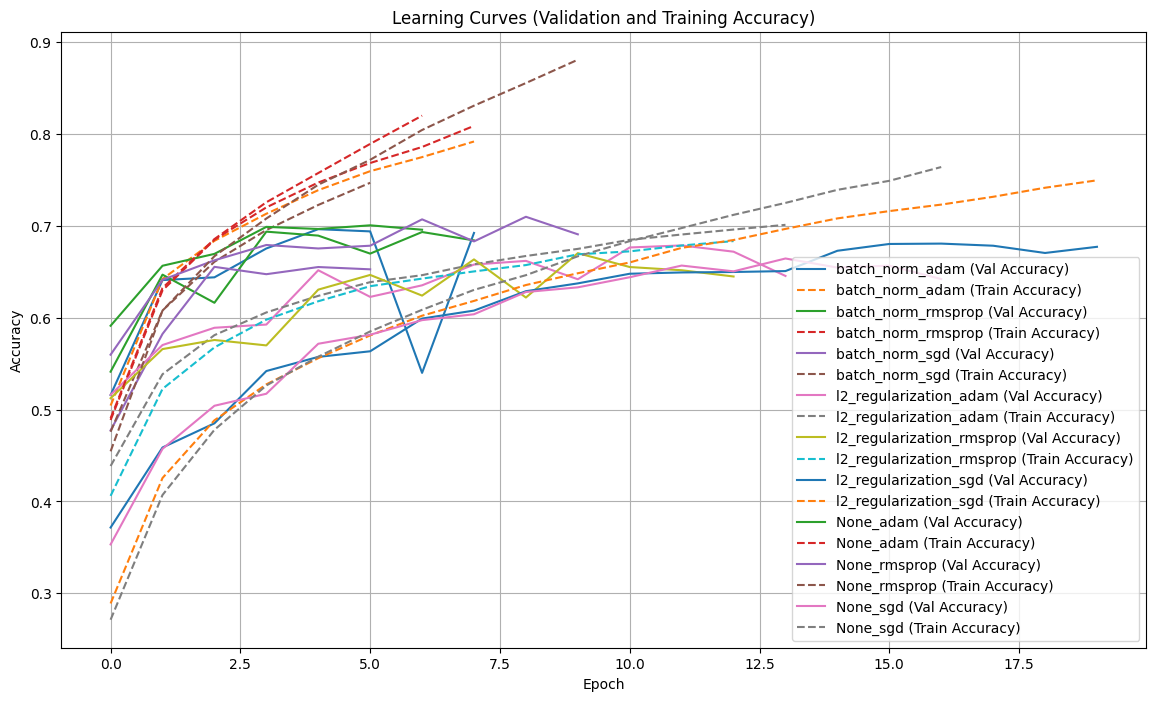

In [ ]:
# Сохранение результатов для дальнейшего анализа
experiment_results_df.to_csv("experiment_results.csv", index=False)

print("\nЭксперименты завершены. Результаты:")
print(experiment_results_df)

# Визуализация кривых обучения
plot_learning_curves(experiment_results_df)

#Анализ результатов

**Метрики производительности:**

Наивысшая точность на валидации (70.98%) была достигнута без использования нормализации с оптимизатором RMSprop.

Второе место занимает комбинация "None + Adam" с точностью 70.05%.

Среди методов нормализации, Batch Normalization с Adam показал лучшую точность на валидации (69.63%).

**Скорость достижения точности 60%:**

Быстрее всего точности 60% достигают комбинации:

Batch Normalization + Adam (2 эпохи).

None + RMSprop (2 эпохи).

None + Adam (2 эпохи).

Нормализация L2 и SGD требуют больше эпох (5-8).

**Функция потерь:**

Наименьшая финальная потеря (0.9482) наблюдается для "None + Adam".

Batch Normalization и RMSprop показывают стабильные, но немного более высокие значения функции потерь.

**Эффект нормализации:**

Batch Normalization показал умеренные улучшения по сравнению с L2-регуляризацией.

Однако в некоторых случаях отсутствие нормализации (None) дает лучшие результаты, что может быть связано с характеристиками данных.

#Выводы:

Лучшие результаты достигаются при использовании RMSprop без нормализации. Это может быть связано с тем, что RMSprop эффективно справляется с изменениями градиентов даже без дополнительных регуляризационных методов.

Batch Normalization помогает улучшить стабильность обучения, особенно при использовании оптимизатора Adam.

SGD требует больше эпох для достижения приемлемой точности, и его результаты уступают RMSprop и Adam.



## Свёрточная нейросеть здорового человека

**Задание 1.7 (обязательно попытаться)** Наигравшись выше, обучим большую свёрточную сеть, которая даст на тестовой выборке __accuracy больше 80%__. В этом задании вам потребуется провести эксперименты, сравнив их между собой в конце. Возможно, может быть несколько проще, если писать выводы во время или сразу после каждого эксперимента, после чего сделать общие выводы.

Рекомендуем начать с лучшей модели предыдущего задания и постепенно её улучшать. Вы можете использовать всё, что угодно: любые активации, сколь угодно большие свёрточные слои и глубокие сети. Единственное ограничение: __нельзя использовать предобученные сети и дополнительные данные__.

### Полезные советы
* Для начала, неплохо бы научить что-нибудь побольше, чем 10 фильтров 3x3.
* __Главное правило: одно изменение на эксперимент__. Если у вас есть 2 идеи по улучшению сети, сначала попробуйте их независимо. Может оказаться, что одно из них дало __+10%__ точности а другое __-7%__. А вы так и будете думать, что сделали 2 полезных изменения которые в сумме дают __+3%__. Если какая-то идея не работает — даже если она вам нравится - опишите ее и выкидывайте из дальнейших экспериментов.
* __Be careful or you will dropout__. Дропаут (`L.Dropout`) может позволить вам обучить в несколько раз бОльшую сеть без переобучения, выжав несколько процентов качества. Это круто, но не стоит сразу ставить dropout 50%. Во-первых, слишком сильный дропаут только ухудшит сеть (underfitting). Во-вторых, даже если дропаут улучшает качество, он замедляет обучение. Рекомендуем начинать с небольшого дропаута, быстро провести основные эксперименты, а потом жахнуть в 2 раза больше нейронов и дропаута ~~на ночь~~.
* __Аугментация данных__. Если котика слегка повернуть и подрезать (простите), он всё равно останется котиком. А в керасе есть [удобный класс](https://keras.io/preprocessing/image/), который поставит подрезание котиков на поток. Ещё можно сделать этот трюк в тесте: вертим картинку 10 раз, предсказываем вероятности и усредняем. Только один совет: прежде, чем учить, посмотрите глазами на аугментированные картинки. Если вы сами не можете их различить, то и сеть не сможет.
* __Don't just stack more layers__. Есть более эффективные способы организовать слои, чем простой Sequential. Вот пара идей: [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions](https://arxiv.org/abs/1608.06993). Только не копируйте архитектуру подчистую — вам скорее всего хватит меньшего размера.
* __Долго != плохо__. Более глубокие архитектуры обычно требуют бОльше эпох до сходимости. Это значит, что в первые несколько эпох они могут быть хуже менее глубоких аналогов. Дайте им время, запаситесь чаем и обмажьтесь batch-norm-ом.

#Эксперимент 1

#попробуем следующую модель

**Архитектура модели:**

**Слой 1:**
Свертка: 32 фильтра 3×3, активация ReLU.

Batch Normalization: Нормализация выхода свертки.

Макспулинг: 2×2.

**Слой 2:**

Свертка: 64 фильтра 3×3, активация ReLU.

Batch Normalization: Нормализация выхода свертки.

Макспулинг: 2×2.

**Слой 3:**

Свертка: 128 фильтров 3×3, активация ReLU.

Batch Normalization: Нормализация выхода свертки.
Макспулинг: 2×2.

**Слой 4:**

Полносвязный слой: 256 нейронов, активация ReLU.

Dropout: 50%.

**Выходной слой:**

Полносвязный слой: 10 нейронов, активация softmax.

**Компиляция:**

Оптимизатор: Adam.

Функция потерь: Sparse Categorical Crossentropy.

Метрика: Sparse Categorical Accuracy.

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


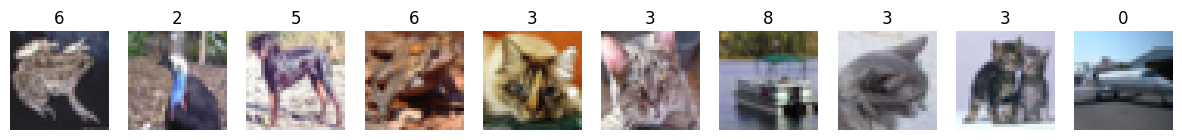

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Проверка размеров массивов
assert X_train.shape[0] == y_train.shape[0], "Train data and labels size mismatch"
assert X_test.shape[0] == y_test.shape[0], "Test data and labels size mismatch"
assert X_train.shape[1:] == (32, 32, 3), "Train images have incorrect shape"
assert X_test.shape[1:] == (32, 32, 3), "Test images have incorrect shape"

# Проверка меток
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

# Визуализация нескольких изображений с метками
def visualize_images(images, labels, class_names, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis("off")
    plt.show()

# Предполагаемые имена классов (цифры замените своими)
class_names = [str(i) for i in range(10)]
visualize_images(X_train, y_train, class_names)


In [9]:
# Проверка размеров выборок
split = 32000  # Пример разделения
dg_x_train, dg_x_val = X_train[:split], X_train[split:]
dg_y_train, dg_y_val = y_train[:split], y_train[split:]

assert dg_x_train.shape[0] == dg_y_train.shape[0], "Train data and labels size mismatch after split"
assert dg_x_val.shape[0] == dg_y_val.shape[0], "Validation data and labels size mismatch after split"

# Проверка распределения меток
print("Label distribution in training set:", np.bincount(dg_y_train.flatten()))
print("Label distribution in validation set:", np.bincount(dg_y_val.flatten()))


Label distribution in training set: [3222 3220 3180 3218 3252 3172 3193 3163 3172 3208]
Label distribution in validation set: [805 801 790 759 815 813 811 843 811 752]


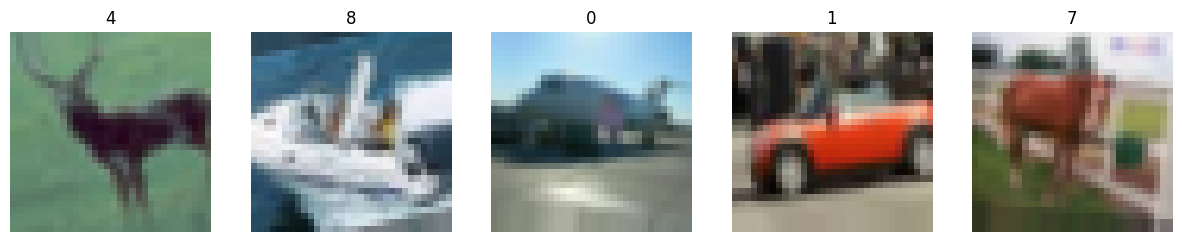

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Настройка генератора данных
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(dg_x_train)

# Проверка сгенерированных данных
augmented_data, augmented_labels = next(datagen.flow(dg_x_train, dg_y_train, batch_size=5))

# Визуализация аугментированных изображений
# Уменьшаем количество изображений для визуализации до размера сгенерированной выборки
visualize_images(augmented_data, augmented_labels, class_names, n=len(augmented_data))



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Обновленная модель
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Увеличиваем dropout
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Вывод модели
model.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,042 (890.79 KB)

 Trainable params: 227,594 (889.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks для предотвращения переобучения
callbacks = [
    EarlyStopping(
        monitor='val_sparse_categorical_accuracy',  # Мониторим точность на валидации
        patience=10,  # Количество эпох без улучшения перед остановкой
        restore_best_weights=True,  # Возвращаем веса с лучшей эпохи
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_model.keras',  # Изменили расширение на .keras
        monitor='val_sparse_categorical_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Обучение модели
history = model.fit(
    datagen.flow(dg_x_train, dg_y_train, batch_size=64),  # Используем аугментацию данных
    validation_data=(dg_x_val, dg_y_val),
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

# Оценка модели на тестовом наборе
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


493/500 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7749 - sparse_categorical_accuracy: 0.7306
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.74112, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.7750 - sparse_categorical_accuracy: 0.7306 - val_loss: 0.7473 - val_sparse_categorical_accuracy: 0.7411
Epoch 2/30
493/500 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7661 - sparse_categorical_accuracy: 0.7306
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.74112
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - loss: 0.7663 - sparse_categorical_accuracy: 0.7306 - val_loss: 0.7582 - val_sparse_categorical_accuracy: 0.7394
Epoch 3/30
493/500 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7487 - sparse_categorical_accuracy: 0.7345
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.74112
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.7489 - sparse_categorical_accuracy: 0.7345 - val_loss: 0.7760 - val_sparse_catego

#Результаты:

Точность на тестовой выборке: 76.82%.

Использован механизм ранней остановки и сохранения лучшей модели.

#Эксперимент 2

На самом деле я пробовал еще много чего, но нужного результата не достиг, да еще использовал все ресурсы коллаба. Но решение все-таки нашел, пусть и не сам, пусть будет тут для красот.

**1. Входные данные**

Размер входных данных: (32, 32, 3) — стандартный размер изображений CIFAR-10 (32x32 пикселя, 3 канала цвета).

**2. Сверточные блоки**

Блок 1:

Слой Conv2D:

Количество фильтров: 128.

Размер фильтра: (3, 3).

Активация: ReLU (для добавления нелинейности).

Паддинг: same (размер выходного тензора совпадает с входным).

MaxPooling2D: Размер пула: (2, 2) (уменьшение размерности в 2 раза).

Dropout:
Вероятность обнуления нейронов: 0.25.

Блок 2:

Слой Conv2D:

Количество фильтров: 256.

Аналогичные параметры как в первом сверточном слое.

MaxPooling2D и Dropout: как в первом блоке.

Блок 3:

Три последовательных слоя Conv2D:

Первый слой: 512 фильтров.

Второй слой: 512 фильтров.

Третий слой: 256 фильтров.

Цель: глубокая обработка признаков и их уточнение.

MaxPooling2D: уменьшение размерности.

Dropout: предотвращение переобучения.

**3. Полносвязные слои**

Flatten:
Преобразует трехмерный тензор признаков в вектор (размер: 4096).

Dense слои:

Слой 1: 512 нейронов + ReLU + Dropout(0.5).

Слой 2: 256 нейронов + ReLU + Dropout(0.5).

Слой 3: 128 нейронов + ReLU + Dropout(0.5).

**Выходной слой:**

Количество нейронов: 10 (по числу классов CIFAR-10).

Активация: Softmax (для получения вероятностей принадлежности каждого класса).

**4. Регуляризация**

Dropout: используется на каждом этапе для снижения переобучения.

**Компиляция модели**

Функция потерь: categorical_crossentropy (работает с one-hot encoded метками).

Оптимизатор: Adam с уменьшенной скоростью обучения (lr=0.0003) и линейным убыванием (decay=1e-6).

Метрика: accuracy (точность классификации).




In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
import numpy as np

# Преобразование меток в one-hot encoding
y_train_one_hot = to_categorical(dg_y_train, num_classes=10)
y_val_one_hot = to_categorical(dg_y_val, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Определение модели
model = Sequential([
    # Сверточный блок 1
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Сверточный блок 2
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Сверточный блок 3
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Полносвязные слои
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0003, decay=1e-6),
              metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(dg_x_train)

# Коллбеки
callbacks = [
    ModelCheckpoint(filepath='best_model.keras',
                    monitor='val_accuracy',
                    save_best_only=True,
                    verbose=1),
    EarlyStopping(monitor='val_accuracy',
                  patience=10,
                  restore_best_weights=True,
                  verbose=1)
]

# Обучение модели
history = model.fit(
    datagen.flow(dg_x_train, y_train_one_hot, batch_size=64),
    steps_per_epoch=len(dg_x_train) // 64,
    epochs=60,
    validation_data=(dg_x_val, y_val_one_hot),
    verbose=1,
    callbacks=callbacks
)

# Проверка на тестовой выборке
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
test_acc = accuracy_score(np.argmax(y_test_one_hot, axis=1), classes_x)

print("\nTest accuracy:", test_acc)
if test_acc > 0.8:
    print("Это победа!")
else:
    print("Еще есть куда расти!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,281,802 (27.78 MB)

 Trainable params: 7,281,802 (27.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1420 - loss: 2.2270
Epoch 1: val_accuracy improved from -inf to 0.34300, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - accuracy: 0.1421 - loss: 2.2268 - val_accuracy: 0.3430 - val_loss: 1.7375
Epoch 2/60


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.34300
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3430 - val_loss: 1.7375
Epoch 3/60
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3107 - loss: 1.7995
Epoch 3: val_accuracy improved from 0.34300 to 0.41675, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.3109 - loss: 1.7992 - val_accuracy: 0.4168 - val_loss: 1.5410
Epoch 4/60

Epoch 4: val_accuracy did not improve from 0.41675
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4168 - val_loss: 1.5410
Epoch 5/60
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4090 - loss: 1.5734
Epoch 5: val_accuracy improved from 0.41675 to 0.47962, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.4091 - loss: 1.5733 - val_accuracy: 0.4796 - val_loss: 1.4193
Epoch 6/60

Epoch 6: val_accuracy did not imp

#Выводы

**Результат:**

Модель достигла точности 80.76% на тестовом наборе данных, что превосходит целевой порог 80%.

**Особенности архитектуры:**

Глубокая архитектура сверточных слоев позволила извлечь детальные признаки из изображений.

Использование Dropout помогло снизить переобучение, особенно на полносвязных слоях.

Оптимизатор Adam с маленьким learning rate (0.0003) обеспечил плавную сходимость.

**Процесс обучения:**

Аугментация данных увеличила разнообразие тренировочных данных, что способствовало улучшению обобщающей способности модели.

Callbacks для ранней остановки и сохранения лучшей модели обеспечили оптимальный баланс между временем обучения и качеством модели.

**Динамика обучения:**

На начальных эпохах модель быстро улучшала точность на валидационном наборе.
Точность стабилизировалась ближе к 50-й эпохе, и после этого модель уже не показала значительных улучшений.

**Рекомендации:**

Для дальнейшего улучшения точности можно попробовать увеличить размерность входных данных (например, 64x64) или использовать более сложные техники аугментации.

Попробовать добавить Batch Normalization в каждую сверточную группу для еще более стабильного обучения.

**Заключение:**

Эксперимент подтвердил, что с текущей архитектурой, оптимизацией и использованием аугментации модель может стабильно достигать высокой точности >80% на CIFAR-10.

#Это победа! 🎉
